# Weekly Payroll Data Analysis

In [1]:
# importing pandas as pd (DataFrame) read CSV(see snap) head()(number of rows)
import pandas as pd
# importing numpy as np (arithmetic operators + - * /) W3School
import numpy as np
# import matplotlib pyplot as plt (use magic function % 0r %%)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as st
import os


In [2]:
weekly_payroll = {
    "1.": {"employee": "Linus Breeze", "Rate": "27.50", "Hours": "40.25", "Dependents": "4"},
    "2.": {"employee": "Juan Santiago", "Rate": "18.75", "Hours": "56.00", "Dependents": "1"},
    "3.": {"employee": "James Webb", "Rate": "28.35", "Hours": "38.00", "Dependents": "3"},
    "4.": {"employee": "Kylie Sabol", "Rate": "21.50", "Hours": "46.50", "Dependents": "6"},
    "5.": {"employee": "Amber Ali", "Rate": "19.35", "Hours": "17.00", "Dependents": "2"},
    "6.": {"employee": "Kevin Goldstein", "Rate": "17.05", "Hours": "28.00", "Dependents": "5"}
}

# Add New Employee
weekly_payroll["7."] = {"employee": "Lee Chang",
                        "Rate": "17.05", "Hours": "28.00", "Dependents": "5"}
weekly_payroll["8."] = {"employee": "Albert Fritz",
                        "Rate": "28.35", "Hours": "38.75", "Dependents": "3"}

# Remove Employee
weekly_payroll.pop("6.")

# Using get: get a value that might not be there
definition = weekly_payroll.get("6.")
if definition:
    print(definition)
else:
    print("Key doesn't exist")


# KEYWORD, FUNCTION NAME, 0 TO MANY PARAMETER(S)
#Docstrings
def extract_info(wp):  # wp = weekly payroll nested dictionary #Doc strings
    """ Extract info from nested dictionary

    Arg: 
        Weekly payroll as nested dictionary

    Returns:
        This function retuns list of Employee, Rate, Hours, Dependents
    """

# Empty list for key
    employee = []
    rate = []
    hours = []
    dependents = []

# For loop nested dictionary
    for i in wp:
        employee.append(wp[i]["employee"])

    for i in wp:
        rate.append(float(wp[i]["Rate"]))

    for i in wp:
        hours.append(float(wp[i]["Hours"]))

    for i in wp:
        dependents.append(float(wp[i]["Dependents"]))
    return employee, rate, hours, dependents


# Total (Gross Pay)
def total_gross_pay(rate, hours):
    tgp = 0  # initial Total Gross pay
    for i in range(len(rate)):
        tgp = tgp + (rate[i] * hours[i])
    tgp = round(tgp, 2)
    return tgp


# (Individual Gross Pay with overtime) (new)
def ind_gross_pay(rate, hours):
    igp = []
    for i in range(len(rate)):
        if hours[i] <= 40:
            igp.append(round(rate[i] * hours[i], 2))
        else:
            igp.append(round((rate[i] * hours[i]) +
                       (.5 * rate[i] * (hours[i] - 40)), 2))

    return igp


# Calculate State Tax = .06  NEED TO CHANGE
def state_tax(igp):
    s_tax = []
    for items in igp:
        s_tax.append(round(items * .032, 2))
    return s_tax


# Federal Tax: flat_rate = [.22]
# Withholding_allowance_per_dependent = [38.46] NEED TO CHANGE
def federal_tax(igp, dep):
    federal_tax = []
    for i in range(len(igp)):
        federal_tax.append(round(.20*(igp[i]-(dep[i]*38.46)), 2))
    return federal_tax


# Net Pay add Social Security and Medicare deductions (NEW)
def net_pay(igp, federal_tax, state_tax, social_security, medicare):
    net_pay = []
    for i in range(len(igp)):
        net_pay.append(round(
            igp[i]-(social_security[i] + medicare[i] + federal_tax[i] + state_tax[i]), 2))
    return net_pay



# Social Security deduction  (with maximum amount applied)
def social_security_limited(ind_gross_pay, YTD_Social_Security):
    global Social_Security_Tax
    global Social_Security_Limit
    social_security = []
    for i in range(len(ind_gross_pay)):
        if (YTD_Social_Security[i] + (Social_Security_Tax * ind_gross_pay[i])) >= Social_Security_Limit:
            social_security.append(
                round(Social_Security_Limit - YTD_Social_Security[i], 2))
        else:
            social_security.append(
                round(Social_Security_Tax * ind_gross_pay[i], 2))

    return social_security


# Medicare deduction (new)
def medicare(igp):
    global Medicare_tax
    medicare = []
    for i in range(len(igp)):
        medicare.append(round(igp[i] * Medicare_tax, 2))
    return medicare


Key doesn't exist


In [3]:
# overwriten by CSV file
# YTD (new)
YTD_Social_Security = [4974.00, 5540.20, 4254.00, 5553.90, 3447.60]

# Add New Employee YTD
YTD_Social_Security.append(4825.50)
YTD_Social_Security.append(5553.90)


# Tax rate .062 for social security 
Social_Security_Tax = .062
# Tax rate .0145 for medicare 
Medicare_tax = .0145


# Maximum Soc. Sec. 
Social_Security_Limit = 5553.90

# my function
def Maindata(wp):
    Employee, Rate, Hours, Dependents = extract_info(wp)
    Ind_Gross_Pay = ind_gross_pay(Rate, Hours)
    State_Tax = state_tax(Ind_Gross_Pay)
    Federal_Tax = federal_tax(Ind_Gross_Pay, Dependents)
    Medicare = medicare(Ind_Gross_Pay)
    Social_Security_Limited = social_security_limited(Ind_Gross_Pay, YTD_Social_Security)
    Net_Pay = net_pay(Ind_Gross_Pay, Federal_Tax, State_Tax, Social_Security_Limited, Medicare)

    Dependents = [int(items) for items in Dependents]

    
    Total_Rate = sum(Rate) #Total Rate
    Total_Hours = sum(Hours) # Total Hours $264.50
    Total_YTD_Social_Security = sum(YTD_Social_Security)  # Total YTD Soc. Sec.
    Total_Ind_Gross_Pay = round(sum(Ind_Gross_Pay),2) # Total Ind. Gross Pay
    Total_Social_Security = round(sum(Social_Security_Limited),2) # Total Social Security
    Total_Medicare = sum(Medicare)# Total Medicare 
    Total_Federal_Tax = sum(Federal_Tax) # Total Federal tax
    Total_State_Tax = sum(State_Tax) # Total State Tax 
    Total_Net_Pay = sum(Net_Pay) # Total Net Pay

    Totals = [Total_Rate, Total_Hours, Total_YTD_Social_Security, Total_Ind_Gross_Pay, Total_Social_Security, 
            Total_Medicare, Total_Federal_Tax, Total_State_Tax, Total_Net_Pay]
    
    # List into DataFrame
    # Dataset
    df = pd.DataFrame([Rate, Hours, YTD_Social_Security, Ind_Gross_Pay, Social_Security_Limited, Medicare, Federal_Tax, State_Tax, Net_Pay],
                  index=['Rate', 'Hours', 'YTD Social Security', 'Ind Gross Pay',
                         'Social Security', 'Medicare', 'Federal Tax', 'State Tax', 'Net Pay'],
                  columns=Employee) 
    df = df.T
    df
    return df, Totals




In [8]:
#  
payroll_tax_data = pd.read_csv('payroll_tax_data.csv')
rows = payroll_tax_data.shape[0]

for i in range(rows):
    year =payroll_tax_data.at[i,"Year"]
    Social_Security_Tax = payroll_tax_data.at[i, "Social_Security_tax"]
    Medicare_tax = payroll_tax_data.at[i, "Medicare_tax"]
    globals()[f'df{year}'], globals()[f'Totals{year}'] = Maindata(weekly_payroll)

    df2021 = df2021
    df2022 = df2022
    df2023 = df2023  
    Totals2021 = Totals2021

In [9]:
# import Dataset 
payroll_tax_data.head()

,Case,Year,Social_Security_tax,Medicare_tax
0,1,2021,0.062,0.0145
1,2,2022,0.080,0.0275
2,3,2023,0.105,0.0225


In [10]:
# 
dftotal2021 = pd.DataFrame([Totals2021], index= ['Totals'], columns=['Rate', 'Hours', 'YTD Social Security', 'Ind Gross Pay',
                         'Social Security', 'Medicare', 'Federal Tax', 'State Tax', 'Net Pay'])
dftotal2021
dfcase1 = pd.concat([df2021, dftotal2021])
dfcase1

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,191.29,35.53,798.55
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,232.31,38.40,898.19
James Webb,28.35,38.00,4254.0,1077.30,66.79,15.62,192.38,34.47,768.04
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,167.77,34.23,852.11
Amber Ali,19.35,17.00,3447.6,328.95,20.39,4.77,50.41,10.53,242.85
Lee Chang,17.05,28.00,4825.5,477.40,29.60,6.92,57.02,15.28,368.58
Albert Fritz,28.35,38.75,5553.9,1098.56,0.00,15.93,196.64,35.15,850.84
Totals,160.85,264.50,34149.1,6362.14,199.32,92.25,1087.82,203.59,4779.16


<AxesSubplot:title={'center':'Weekly Payroll'}>

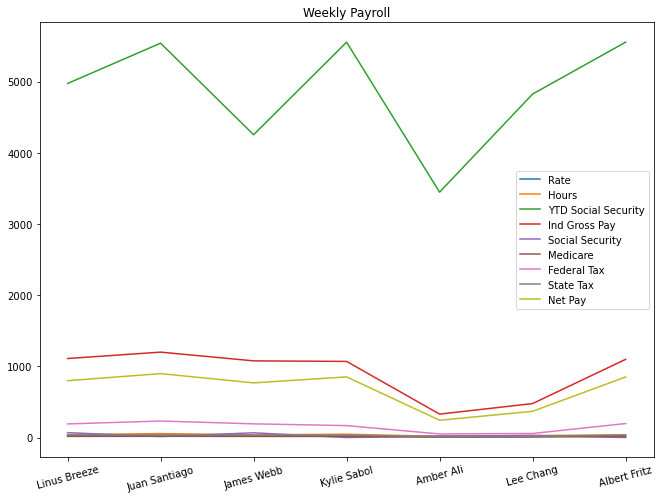

In [11]:
df2021.plot(kind='line',rot = 15,title = 'Weekly Payroll', figsize=(11,8))

In [12]:
# Summary of dataset
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Linus Breeze to Albert Fritz
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rate                 7 non-null      float64
 1   Hours                7 non-null      float64
 2   YTD Social Security  7 non-null      float64
 3   Ind Gross Pay        7 non-null      float64
 4   Social Security      7 non-null      float64
 5   Medicare             7 non-null      float64
 6   Federal Tax          7 non-null      float64
 7   State Tax            7 non-null      float64
 8   Net Pay              7 non-null      float64
dtypes: float64(9)
memory usage: 560.0+ bytes


In [13]:
df2021.select_dtypes(np.number)

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,191.29,35.53,798.55
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,232.31,38.40,898.19
James Webb,28.35,38.00,4254.0,1077.30,66.79,15.62,192.38,34.47,768.04
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,167.77,34.23,852.11
Amber Ali,19.35,17.00,3447.6,328.95,20.39,4.77,50.41,10.53,242.85
Lee Chang,17.05,28.00,4825.5,477.40,29.60,6.92,57.02,15.28,368.58
Albert Fritz,28.35,38.75,5553.9,1098.56,0.00,15.93,196.64,35.15,850.84


In [14]:
# Dimensions of dataset(instances and variables)  
df2021.shape

(7, 9)

In [15]:
# Check for missing values
df2021.isnull().sum()

Rate                   0
Hours                  0
YTD Social Security    0
Ind Gross Pay          0
Social Security        0
Medicare               0
Federal Tax            0
State Tax              0
Net Pay                0
dtype: int64

In [16]:
# All info. of a single employee
df2021.loc["Linus Breeze"]

Rate                     27.50
Hours                    40.25
YTD Social Security    4974.00
Ind Gross Pay          1110.31
Social Security          68.84
Medicare                 16.10
Federal Tax             191.29
State Tax                35.53
Net Pay                 798.55
Name: Linus Breeze, dtype: float64

In [17]:
# single value for row/columns par
df2021.iloc[5:6, 1:2]

,Hours
Lee Chang,28.0


In [18]:
# Employee with overtime
df2021.loc[df2021["Hours"] > 40]

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,191.29,35.53,798.55
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,232.31,38.40,898.19
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,167.77,34.23,852.11


In [19]:
# Employee who reached Social Security Limit for a year
df2021.loc[df2021["YTD Social Security"] >= 5553.90]

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.0,15.51,167.77,34.23,852.11
Albert Fritz,28.35,38.75,5553.9,1098.56,0.0,15.93,196.64,35.15,850.84


Text(0.5, 1.0, 'Histogram of YTD Social Security')

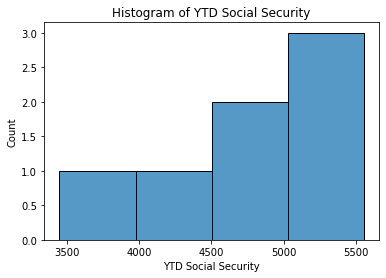

In [32]:
sns.histplot(df2021['YTD Social Security'], kde =False, bins= 4).set_title("Histogram of YTD Social Security")

In [38]:
df2021.skew()

Rate                   0.130296
Hours                 -0.378875
YTD Social Security   -1.049205
Ind Gross Pay         -1.226581
Social Security        0.698481
Medicare              -1.226440
Federal Tax           -0.927962
State Tax             -1.226534
Net Pay               -1.204664
dtype: float64

In [21]:
#Table case 1 Year 2021 (sst 0.062 and medtax 0.0145)
df2021.iloc[ :, [2, 4,5]]

,YTD Social Security,Social Security,Medicare
Linus Breeze,4974.0,68.84,16.10
Juan Santiago,5540.2,13.70,17.40
James Webb,4254.0,66.79,15.62
Kylie Sabol,5553.9,0.00,15.51
Amber Ali,3447.6,20.39,4.77
Lee Chang,4825.5,29.60,6.92
Albert Fritz,5553.9,0.00,15.93


In [22]:
#Table case 2 Year 2022(sst 0.080 and medtax 0.0275) assumption
df2022.iloc[ :, [2, 4,5]]

,YTD Social Security,Social Security,Medicare
Linus Breeze,4974.0,88.82,30.53
Juan Santiago,5540.2,13.70,33.00
James Webb,4254.0,86.18,29.63
Kylie Sabol,5553.9,0.00,29.41
Amber Ali,3447.6,26.32,9.05
Lee Chang,4825.5,38.19,13.13
Albert Fritz,5553.9,0.00,30.21


In [23]:
#Table case 3 Year 2023(sst 0.105and medtax 0.0225) assumption
df2023.iloc[ :, [2, 4,5]]

,YTD Social Security,Social Security,Medicare
Linus Breeze,4974.0,116.58,24.98
Juan Santiago,5540.2,13.70,27.00
James Webb,4254.0,113.12,24.24
Kylie Sabol,5553.9,0.00,24.07
Amber Ali,3447.6,34.54,7.40
Lee Chang,4825.5,50.13,10.74
Albert Fritz,5553.9,0.00,24.72


In [24]:
# Statistical Data (numerical)
# The describe() function gives us the count, mean, standard deviation(std), minimum, Q1(25%), 
# median(50%), Q3(75%), IQR(Q3 - Q1) and maximum values. 
df2021.describe()

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,22.978571,37.785714,4878.442857,908.877143,28.474286,13.178571,155.402857,29.084286,682.737143
std,4.941816,12.533645,795.778602,350.713521,28.878935,5.085854,72.025504,11.220716,263.391430
min,17.050000,17.000000,3447.600000,328.950000,0.000000,4.770000,50.410000,10.530000,242.850000
25%,19.050000,33.000000,4539.750000,773.510000,6.850000,11.215000,112.395000,24.755000,568.310000
50%,21.500000,38.750000,4974.000000,1077.300000,20.390000,15.620000,191.290000,34.470000,798.550000
75%,27.925000,43.375000,5547.050000,1104.435000,48.195000,16.015000,194.510000,35.340000,851.475000
max,28.350000,56.000000,5553.900000,1200.000000,68.840000,17.400000,232.310000,38.400000,898.190000


In [ ]:
# Centrality Measure
# Mean, Median, & Mode

In [ ]:
#Mean is the average value that is equal to the ration of sum of values in a data set and total number of values.
df2021.mean() # Mean

Rate                     22.978571
Hours                    37.785714
YTD Social Security    4878.442857
Ind Gross Pay           908.877143
Social Security          28.474286
Medicare                 13.178571
Federal Tax             155.402857
State Tax                29.084286
Net Pay                 682.737143
dtype: float64

In [ ]:
# Median is the central value of given set of values when arranged in an order. 
# Centrality Measure
df2021.median() # Median

Rate                     21.50
Hours                    38.75
YTD Social Security    4974.00
Ind Gross Pay          1077.30
Social Security          20.39
Medicare                 15.62
Federal Tax             191.29
State Tax                34.47
Net Pay                 798.55
dtype: float64

In [ ]:
# Centrality Measure
# Nan - the computer cannot represent a value.
# Mode is the most repetitive value of a given set of values In statistics, the mode is the value that is repeatedly occurring in a given set. 
# We can also say that the value or number in a data set, which has a high frequency or appears more frequently, is called mode or modal value. 
# A mode is defined as the value that has a higher frequency in a given set of values. 
# It is the value that appears the most number of times. 
df2021.mode() # Mode

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
0,28.35,17.00,5553.9,328.95,0.0,4.77,50.41,10.53,242.85
1,NaN,28.00,NaN,477.40,NaN,6.92,57.02,15.28,368.58
2,NaN,38.00,NaN,1069.62,NaN,15.51,167.77,34.23,768.04
3,NaN,38.75,NaN,1077.30,NaN,15.62,191.29,34.47,798.55
4,NaN,40.25,NaN,1098.56,NaN,15.93,192.38,35.15,850.84
5,NaN,46.50,NaN,1110.31,NaN,16.10,196.64,35.53,852.11
6,NaN,56.00,NaN,1200.00,NaN,17.40,232.31,38.40,898.19


In [ ]:
# Dispersion measures
# minimum and maximum values, range, variance, standard-deviation, Q1, Q2, Q3, & IQR.

In [ ]:
df2021.min() # Minimum

Rate                     17.05
Hours                    17.00
YTD Social Security    3447.60
Ind Gross Pay           328.95
Social Security           0.00
Medicare                  4.77
Federal Tax              50.41
State Tax                10.53
Net Pay                 242.85
dtype: float64

In [ ]:
df2021.max() # Maximum

Rate                     28.35
Hours                    56.00
YTD Social Security    5553.90
Ind Gross Pay          1200.00
Social Security          68.84
Medicare                 17.40
Federal Tax             232.31
State Tax                38.40
Net Pay                 898.19
dtype: float64

In [ ]:
# Measures the difference between the minimum and maximum value in a dataset.
df2021.max() - df2021.min() # Range

Rate                     11.30
Hours                    39.00
YTD Social Security    2106.30
Ind Gross Pay           871.05
Social Security          68.84
Medicare                 12.63
Federal Tax             181.90
State Tax                27.87
Net Pay                 655.34
dtype: float64

In [ ]:
# Variance is a measure of how data points differ from the mean.
#  According to Layman, a variance is a measure of how far a set of data (numbers) are spread out from their mean (average) value.
df2021.var() # Variance

Rate                       24.421548
Hours                     157.092262
YTD Social Security    633263.582857
Ind Gross Pay          122999.973490
Social Security           833.992862
Medicare                   25.865914
Federal Tax              5187.673257
State Tax                 125.904462
Net Pay                 69375.045524
dtype: float64

In [ ]:
# Measures the typical deviation of individual values from the mean value in a dataset.
df2021.std() # Standard Deviation

Rate                     4.941816
Hours                   12.533645
YTD Social Security    795.778602
Ind Gross Pay          350.713521
Social Security         28.878935
Medicare                 5.085854
Federal Tax             72.025504
State Tax               11.220716
Net Pay                263.391430
dtype: float64

In [ ]:
Q1 = df2021.quantile(0.25) # 25 percentile (Q1)
Q1

Rate                     19.050
Hours                    33.000
YTD Social Security    4539.750
Ind Gross Pay           773.510
Social Security           6.850
Medicare                 11.215
Federal Tax             112.395
State Tax                24.755
Net Pay                 568.310
Name: 0.25, dtype: float64

In [ ]:
Q2 = df2021.quantile(0.5) # 50 percentile (Q2) or # Median
Q2 

Rate                     21.50
Hours                    38.75
YTD Social Security    4974.00
Ind Gross Pay          1077.30
Social Security          20.39
Medicare                 15.62
Federal Tax             191.29
State Tax                34.47
Net Pay                 798.55
Name: 0.5, dtype: float64

In [ ]:
Q3 = df2021.quantile(0.75) # 75 percentile (Q3)
Q3

Rate                     27.925
Hours                    43.375
YTD Social Security    5547.050
Ind Gross Pay          1104.435
Social Security          48.195
Medicare                 16.015
Federal Tax             194.510
State Tax                35.340
Net Pay                 851.475
Name: 0.75, dtype: float64

In [ ]:
# The difference between the first quartile (the 25th percentile) and the third quartile (the 75th percentile) of the dataset.
IQR = Q3 - Q1 # Interquartile Range is not affected by extreme outliers
IQR

Rate                      8.875
Hours                    10.375
YTD Social Security    1007.300
Ind Gross Pay           330.925
Social Security          41.345
Medicare                  4.800
Federal Tax              82.115
State Tax                10.585
Net Pay                 283.165
dtype: float64

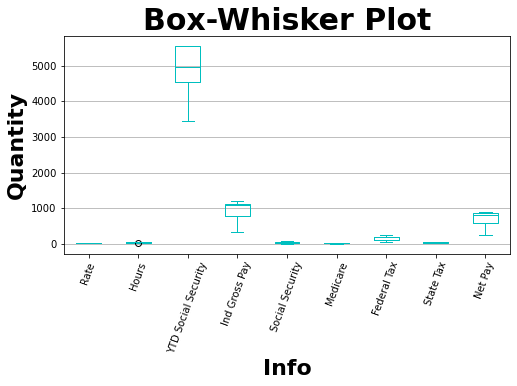

In [26]:
# Box-Whisker plot   #plt.bar(x,y)
font = {'family' : 'normal', 
        'color' : 'k',
        'weight' : 'bold',
        'size'   : 22}       

font2 = {'family' : 'normal', 
        'color' : 'k',
        'weight' : 'bold',
        'size'   : 30}      

plt = df2021.boxplot(rot=70, color= 'c', figsize=(8,4))
plt.set_title('Box-Whisker Plot', fontdict= font2)
plt.set_xlabel('Info', fontdict= font)
plt.set_ylabel('Quantity', fontdict= font)
#pt.spines['left'].set_color('black')
plt.grid(axis='x')


In [ ]:
# df2021['Net Pay'] = df2021['Net Pay'].fillna(df2021['Net Pay'].mean())    ? 
#Q1 = df2021.quantile(.25) #see this Alex must look if we need this one
#Q3 = df2021.quantile(.75)
#IQR = Q3-Q1
#df = df2021[~((df2021<(Q1-1.5*IQR)) | (df2021>(Q3+1.5*IQR))).any(axis=1)]